In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#google colab drive mount code

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
# reading data file
df = pd.read_csv('/content/gdrive/My Drive/Data/WELFake_Dataset.csv')



In [ ]:
df.head()


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
df.columns = ["id","title","text","label"]

In [ ]:
df.head()

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      72134 non-null  int64 
 1   title   71576 non-null  object
 2   text    72095 non-null  object
 3   label   72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
# read in our data and preprocess it

df.drop(labels=['id','title'], axis='columns', inplace=True)


In [ ]:
df['text']

0        No comment is expected from Barack Obama Membe...
1           Did they post their votes for Hillary already?
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 72134, dtype: object

In [ ]:
df.dropna(subset = ["text"], inplace=True)


In [ ]:
# Removing stopwords
# we import the necessary modules from NLTK and download the stopwords corpus and the "punkt" tokenizer using nltk.download(). The stopword_removal function remains the same, utilizing the stopwords from the NLTK corpus for removal.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def stopword_removal(row):
    text = row['text']
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['text'] = df.apply(stopword_removal, axis=1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Converting text into smaller letters.

df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

<ipython-input-28-b3aba37379ec>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [ ]:
# prepare text samples and their labels

texts = df['text']
labels = df['label']

print('Found %s texts.' %texts.shape[0])

Found 72095 texts.


In [ ]:
texts = texts.fillna("")


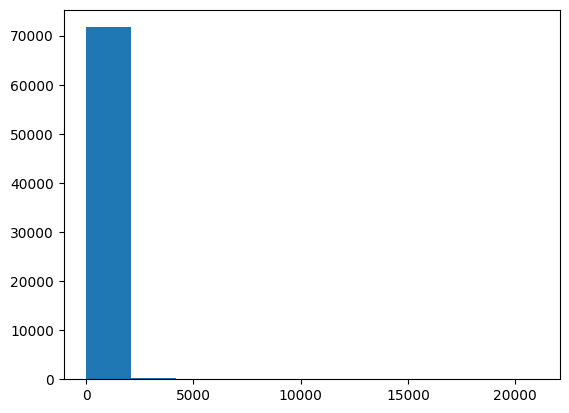

In [ ]:
# plot the distribution of article lengths in terms of word counts

text_lengths = texts.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

In [ ]:
MAX_SEQUENCE_LENGTH = 700
MAX_NUM_WORDS = 10000  # Increase vocabulary size to capture more diverse information
EMBEDDING_DIM = 100  # Increase embedding dimension for richer representations
TEST_SPLIT = 0.2

In [ ]:
!pip install keras_preprocessing


In [ ]:
# Consider importing the pad_sequences function directly from tensorflow.keras.preprocessing.sequence instead of keras_preprocessing.sequence. This will ensure consistency in the import statements.

#Add a parameter oov_token='<OOV>' when creating the Tokenizer. This will assign a special token <OOV> (Out-Of-Vocabulary) to words that are not present in the vocabulary. It can be helpful during inference when encountering unseen words.

#Update the num_words calculation to ensure it doesn't exceed the maximum number of words specified by MAX_NUM_WORDS. It can modify the line to num_words = min(MAX_NUM_WORDS, len(word_index)) without adding 1.
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Vectorize the text samples into a 2D integer tensor

# Tokenizing sentences into words
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Calculating word_index
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index))

data = pad_sequences(sequences,
                     maxlen=MAX_SEQUENCE_LENGTH,
                     padding='pre',
                     truncating='pre')

print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


Found 242765 unique tokens.
Shape of data tensor: (72095, 700)
Shape of label tensor: (72095,)


In [ ]:
# split the data into a training set and a validation set   

from sklearn.model_selection import train_test_split



x, x_test, y, y_test = train_test_split(data, 
                                        labels, 
                                        test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y, 
                                                  test_size=0.1)



In [ ]:
x_train.shape

(51908, 700)

In [ ]:
x_val.shape

(5768, 700)

In [ ]:
x_test.shape

(14419, 700)

In [ ]:

from keras import layers
from keras.layers import LSTM, SimpleRNN, Reshape
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from keras.optimizers import Adam

# Adjusted hyperparameters
MAX_SEQUENCE_LENGTH = 700
MAX_NUM_WORDS = 1000
EMBEDDING_DIM = 64
TEST_SPLIT = 0.2

# Building convolutional neural network model
model = Sequential([
    # Part 1: Word and sequence processing
    Embedding(242766, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, trainable=False),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.4),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2, strides=2),
    Conv1D(16, 3, activation='relu'),
    LSTM(128, return_sequences=True),
    Reshape((-1, 128)),
    SimpleRNN(64),
    Flatten(),
    
    # Part 2: Classification
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Printing model summary
model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 700, 64)           15537024  
                                                                 
 conv1d_6 (Conv1D)           (None, 698, 64)           12352     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 349, 64)          0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 349, 64)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 347, 32)           6176      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 173, 32)          0         
 1D)                                                  

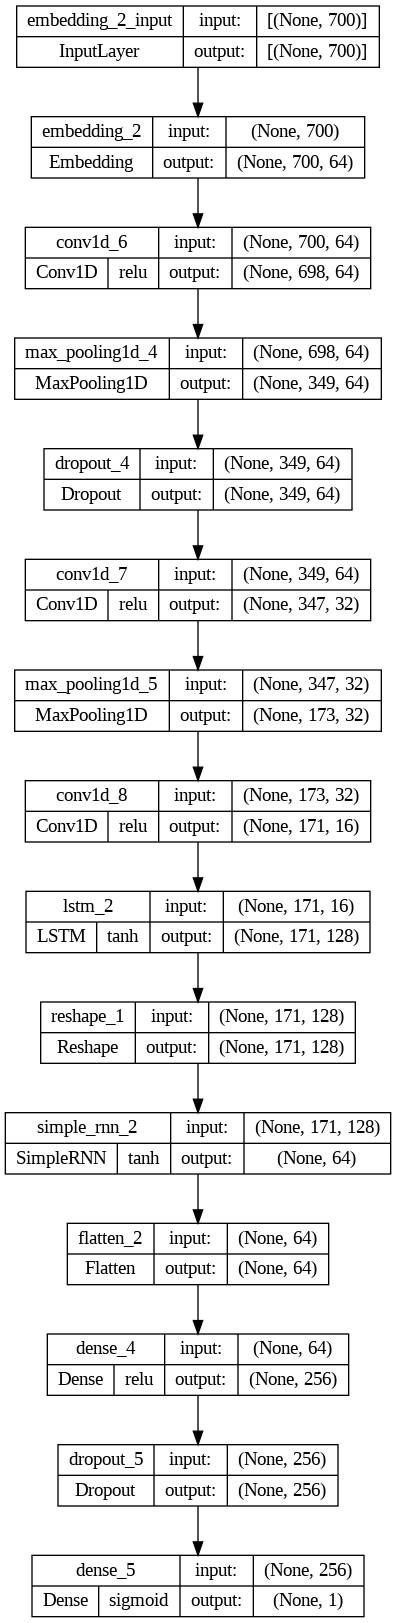

In [ ]:
# visalizing the layers of model.
import tensorflow as tf

tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
# train the model with batch size of 128 and 15 epochs.
import time as t
start = t.time()
history = model.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_val, y_val))

print("total training time:",t.time()-start)

Epoch 1/15
406/406 [==============================] - 106s 235ms/step - loss: 0.6700 - accuracy: 0.5732 - val_loss: 0.6583 - val_accuracy: 0.5997
Epoch 2/15
406/406 [==============================] - 92s 227ms/step - loss: 0.5763 - accuracy: 0.6971 - val_loss: 0.5206 - val_accuracy: 0.8032
Epoch 3/15
406/406 [==============================] - 96s 236ms/step - loss: 0.5510 - accuracy: 0.7095 - val_loss: 0.3491 - val_accuracy: 0.8585
Epoch 4/15
406/406 [==============================] - 95s 233ms/step - loss: 0.3237 - accuracy: 0.8663 - val_loss: 0.3286 - val_accuracy: 0.8563
Epoch 5/15
406/406 [==============================] - 90s 222ms/step - loss: 0.2926 - accuracy: 0.8785 - val_loss: 0.3044 - val_accuracy: 0.8701
Epoch 6/15
406/406 [==============================] - 92s 226ms/step - loss: 0.2601 - accuracy: 0.8907 - val_loss: 0.2312 - val_accuracy: 0.9019
Epoch 7/15
406/406 [==============================] - 92s 225ms/step - loss: 0.2324 - accuracy: 0.9012 - val_loss: 0.2144 - val_a

In [ ]:
!pip install keras_flops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2_as_graph

In [ ]:
def get_flops(model, batch_size=None):
    if batch_size is None:
        batch_size = 1

    real_model = tf.function(model).get_concrete_function(tf.TensorSpec([batch_size] + model.inputs[0].shape[1:], model.inputs[0].dtype))
    frozen_func, graph_def = convert_variables_to_constants_v2_as_graph(real_model)

    run_meta = tf.compat.v1.RunMetadata()
    opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
    flops = tf.compat.v1.profiler.profile(graph=frozen_func.graph,
                                            run_meta=run_meta, cmd='op', options=opts)
    return flops.total_float_ops

In [ ]:
# calculating flops
flops = get_flops(model, batch_size = 128)
print(flops)
print(f"FLOPS: {flops / 10 ** 9:.03} G ")

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


2829764736
FLOPS: 2.83 G 


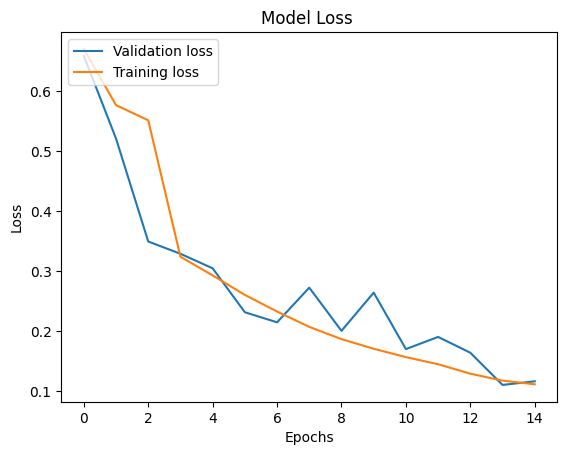

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Validation loss', 'Training loss'], loc='upper left')
plt.show()

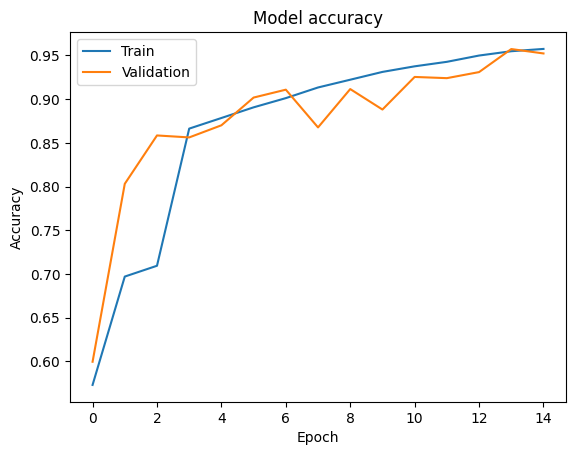

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing phase

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
451/451 [==============================] - 10s 22ms/step - loss: 0.1166 - accuracy: 0.9537
test loss, test acc: [0.11659695953130722, 0.9536722302436829]


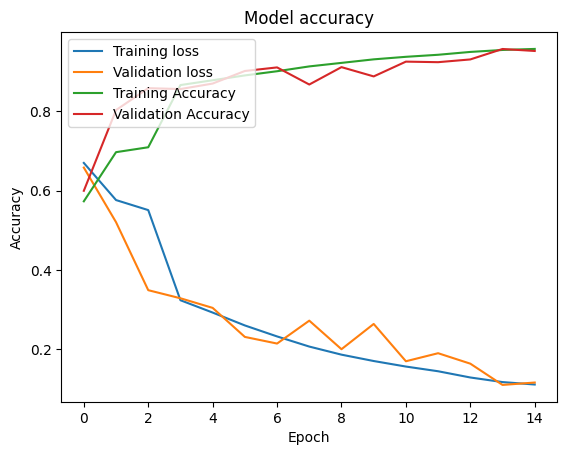

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss','Training Accuracy','Validation Accuracy'], loc='upper left')
plt.show()

# Evaluation Phase

In [ ]:
# define a function that allows us to evaluate models

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,classification_report,roc_curve



def evaluate_model(predict_fun, X_train, y_train, X_test, y_test):
    '''
    evaluate the model, both training and testing accuraries are reported
    '''
    # training acc
    y_predict_train = predict_fun(X_train)
    train_acc = accuracy_score(y_train,y_predict_train)
    
    # testing acc
    y_predict_test = predict_fun(X_test)
    test_acc = accuracy_score(y_test,y_predict_test)
    

    # accuracy = accuracy_score(y_test,y_pred_tex)
    roc_auc =roc_auc_score(y_test, y_predict_test)
    precision = precision_score(y_pred=y_predict_test, y_true=y_test,zero_division=1)
    recall = recall_score(y_pred=y_predict_test, y_true=y_test,zero_division=1)
    
    cr = classification_report(y_test, y_predict_test,zero_division=1)


    fpr, tpr, threshold = roc_curve(y_test, y_predict_test)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label= 'CNN')
    plt.xlabel('False Positive Rate',fontsize=12)
    plt.ylabel('True Positive Rate',fontsize=12)
    plt.title('%s ROC Curve'% 'CNN',fontsize=20)
    plt.legend(fontsize=12)
    plt.show()

    roc_auc_sc = roc_auc_score(y_test,y_predict_test)

    return train_acc, test_acc,cr,roc_auc_sc

451/451 [==============================] - 12s 26ms/step


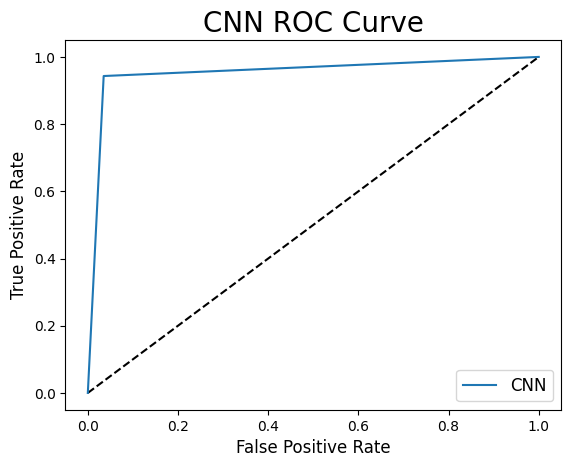

Training Accuracy: 96.83%
Testing Accuracy: 95.37%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      6997
           1       0.97      0.94      0.95      7422

    accuracy                           0.95     14419
   macro avg       0.95      0.95      0.95     14419
weighted avg       0.95      0.95      0.95     14419

AUC score 0.9539920427074513
Total time required for testing 62.72651791572571


In [ ]:
# evaluate model
import time as t
start = t.time()
train_acc, test_acc,cr,roc_auc_sc = evaluate_model(lambda x: np.rint(model.predict(x)),
                                     x_train, 
                                     y_train, 
                                     x_test, 
                                     y_test)
print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))
print("Classification Report:\n",cr)
print("AUC score",roc_auc_sc)
print("Total time required for testing",t.time()-start)

# Extended experiment using weights transfer